# Process 3


In [1]:
#importing dependencies

import pandas as pd 
import numpy as np
from scipy import stats

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns 


from scipy import stats

# for min_max scaling and normalization
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Yiwei
# path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Wilson Alexei - Competition1_raw_data.xlsx'

#Jose

path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Jose Echevarria - Competition1_raw_data.xlsx'

In [4]:
#Creating DF from path

df = pd.read_excel(path)

In [5]:
df.shape ## datasets have 682 rows and 22 columns

(682, 22)

In [6]:
df.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.599998,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,...,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,...,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,...,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147


In [7]:
#All coluumns are of type object

df.dtypes

I1         object
I2         object
I3         object
P(IPO)     object
P(H)       object
P(L)       object
P(1Day)    object
C1         object
C2         object
C3         object
C4         object
C5         object
C6         object
C7         object
T1         object
T2         object
T3         object
T4         object
T5         object
S1         object
S2         object
S3         object
dtype: object

*   As we read in the excel file, we see that all the data types are all objects so preprocessing data will be needed to do further analysis
*   We will convert them accordingly depending on the data dictionary. Continuous columns will be converted into integers/float and categorical columns may need to be converted into integers first and will be converted into a categorical/binary eventually 
*   This will also help us to spot null values in each column and impute themaccordingly as well


In [8]:
## List of Industry SIC Codes

manuf_codes = [3674,3714,3661,2000,3690,3743,3721,3663,3411,2673,3621,3640,2621,3670,\
               2300,3021,3281,3651,2741,3663,2711,2090,3315,3651,2741,3663,2711,2090,\
               3315,3651,3990,3911,2015,3140,2790,2590,3100,2200,3390,3672,3334,3646,\
               3629,3442,3312,3440,3663,2080,3669,3812,3728,3452,3711,2750,3171,3720,\
               2221,3341,2510]

serv_codes = [7379,2854,3845,7389,5047,3841,5812,7334,2869,7359,2844,5945,5961,8090,\
              5033,8351,8731,5661,5600,5641,5940,5810,7312,7311,100,2870,5141,7997,\
              3822,5731,3825,7361,7993,7830,7812,5331,7319,5500,3861,7819,5712,5150,\
              8051,8000,8071,3081,8711,8062,7350,3842,2800,8742,5074,3826,5065,5160,\
              5051,5010,2860,2821,8082,7941,5084,5411,5944,2890,7380,5149,5900,5531,\
              5960,3861,8060,7384,3851,8011,3823,5412,5499,5080,7310,2810,2875,7389,\
              5063,5400,7929,7514]

other_codes = [2834,4492,2836,7372,2835,3568,4512,2911,8099,4931,8221,3576,8200,1311,\
               3577,4941,7373,4412,1389,1381,7371,4822,4813,4832,4213,3561,1221,4899,\
               1400,6331,3572,6794,3511,3555,4731,7374,7375,3559,541990,7370,5632,3583,\
               1382,4400,4955,6153,6324,4911,4812,4581,7011,4833,3571,4700,3578,1731,\
               3531,3999,8322,4011,6794,3562,1446,1600,4922,4953]

Here are the 3 lists of SIC codes for their selected industries as we segment them into 3 main industries which are `Manufacturing`, `Service`, and `Others`. `Others` includes industries such as Life Sciences, Technology, Finance, and etc. We will create the extra features in the Feature Engineering section. 

# Preprocessing -- EDA


## Converting Continuous Values to Float


In [9]:
## Creating a function to convert the continuous columns to float
def convert_to_float(df, col_names):
    for col in col_names:
        if col not in df.columns:
            print(f"{col} not found in DataFrame.")
        elif df[col].dtype == 'float64':
            print(f"{col} is already of type float.")
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce') #default parameter is float64
    return df

In [10]:
## List of continuous columns
cols = ['S1','S2','S3','T1','T2','T3','T4','T5','P(IPO)','P(H)','P(L)',\
       'P(1Day)','C1','C2','C3','C4','C5','C6','C7','I3']

In [11]:
## Converting to float
df = convert_to_float(df, cols)
df.dtypes

I1          object
I2          object
I3         float64
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

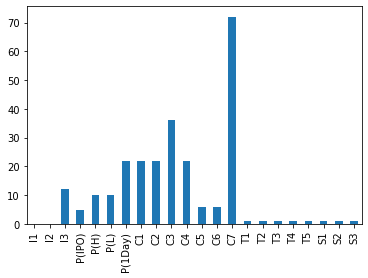

In [12]:
# Plotting null values in the columns
df.isna().sum().plot(kind='bar')

The bar graph above shows the sum of null values (`NaN`) for all the columns. As we can see, both continuous and categorical columns contain null values but we will use the `median` to `fillna()` the **continuous** columns and use the `mode` to `fillna()` the ***categorical*** columns

<ipython-input-13-6d1b35f6ff5d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().plot(kind='bar')


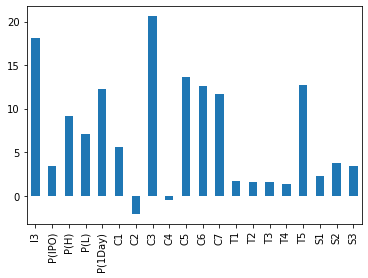

In [13]:
# Plotting the skewness of the columns
df.skew().plot(kind='bar')

In [14]:
df.skew()

<ipython-input-14-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


I3         18.126113
P(IPO)      3.390065
P(H)        9.215324
P(L)        7.106899
P(1Day)    12.318970
C1          5.649485
C2         -2.068874
C3         20.593747
C4         -0.477892
C5         13.601573
C6         12.559330
C7         11.714131
T1          1.739135
T2          1.638533
T3          1.616041
T4          1.419060
T5         12.762933
S1          2.310386
S2          3.734571
S3          3.437272
dtype: float64

Columns `C1` and `C7` are some of the more skewed columns so we decided to early normalization using `np.log()` before we proceed on the normalization later on using `PowerTransformer()`

## Dropping 22 Companies with Null P(1Day)

After further research on the null values on the `P(1Day)`, we realized that there are 22 IPO companies who did NOT have First Day Trading Price so we decided to drop the 22 IPO companies as we assume that there may be some delays due to either regulatory issues, market conditions against their favors, or company-specific issues. 

In [15]:
## Companies with Null `P(1Day)`
df[df['P(1Day)'].isna()==True]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621.0,4.50,6.5,5.50,NaN,NaN,NaN,NaN,...,5000000.0,NaN,351.0,10352.0,9296.0,235.0,482.0,52.0,124.0,120.0
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640.0,3.00,5.0,4.00,NaN,NaN,NaN,59.261,...,3350000.0,59.261,406.0,12065.0,11056.0,282.0,667.0,72.0,169.0,182.0
203,ELMD,"Electromed, Inc.",3845.0,4.00,6.0,4.00,NaN,NaN,NaN,12.999,...,1700000.0,12.999,224.0,6146.0,5551.0,154.0,386.0,29.0,52.0,140.0
215,ESEA,EUROSEAS LTD.,4412.0,7.00,NaN,NaN,NaN,NaN,NaN,NaN,...,9602340.0,NaN,521.0,12812.0,11190.0,285.0,545.0,72.0,60.0,121.0
217,EURX,EURAND N.V.,2834.0,16.00,19.0,17.00,NaN,NaN,NaN,109.336,...,7000000.0,109.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,GSL,GLOBAL SIGNAL INC,NaN,18.00,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0
286,HPJ,"Highpower International, Inc.",3690.0,3.25,4.0,3.00,NaN,NaN,NaN,73.262,...,525000.0,73.262,377.0,10731.0,9703.0,240.0,486.0,45.0,104.0,96.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0


These 22 IPO Companies are missing the First Day Trading Price `P(1Day)` so we decided to drop these companies

In [16]:
droppable_ipo = df[df['P(1Day)'].isna()==True].index
droppable_ipo

Int64Index([ 10,  86, 115, 123, 203, 215, 217, 268, 286, 330, 357, 400, 401,
            410, 490, 496, 503, 560, 597, 614, 615, 675],
           dtype='int64')

In [17]:
df = df.drop(droppable_ipo, axis=0)
df

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,ZIP,ZIPCAR INC,7514.0,18.0,16.0,14.0,28.000000,317.0,1.0,-0.37,...,9684109.0,186.101,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
678,ZLTQ,Zeltiq Aesthetics Inc,3845.0,13.0,16.0,14.0,15.500000,98.0,1.0,-0.41,...,7000000.0,25.461,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
679,ZSTN,"ZST Digital Networks, Inc.",3663.0,8.0,8.5,7.5,7.520000,112.0,0.0,0.60,...,3125000.0,55.431,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
680,ZUMZ,Zumiez Inc,5600.0,19.0,17.0,15.0,12.435000,78.0,1.0,0.20,...,3125000.0,117.857,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


In [18]:
reset_df = df.reset_index()
reset_df.set_index('index', drop=True)
reset_df

,index,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,677,ZIP,ZIPCAR INC,7514.0,18.0,16.0,14.0,28.000000,317.0,1.0,...,9684109.0,186.101,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
656,678,ZLTQ,Zeltiq Aesthetics Inc,3845.0,13.0,16.0,14.0,15.500000,98.0,1.0,...,7000000.0,25.461,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
657,679,ZSTN,"ZST Digital Networks, Inc.",3663.0,8.0,8.5,7.5,7.520000,112.0,0.0,...,3125000.0,55.431,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
658,680,ZUMZ,Zumiez Inc,5600.0,19.0,17.0,15.0,12.435000,78.0,1.0,...,3125000.0,117.857,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


In [19]:
reset_df = reset_df.drop('index', axis=1)
reset_df

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,ZIP,ZIPCAR INC,7514.0,18.0,16.0,14.0,28.000000,317.0,1.0,-0.37,...,9684109.0,186.101,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
656,ZLTQ,Zeltiq Aesthetics Inc,3845.0,13.0,16.0,14.0,15.500000,98.0,1.0,-0.41,...,7000000.0,25.461,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
657,ZSTN,"ZST Digital Networks, Inc.",3663.0,8.0,8.5,7.5,7.520000,112.0,0.0,0.60,...,3125000.0,55.431,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
658,ZUMZ,Zumiez Inc,5600.0,19.0,17.0,15.0,12.435000,78.0,1.0,0.20,...,3125000.0,117.857,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


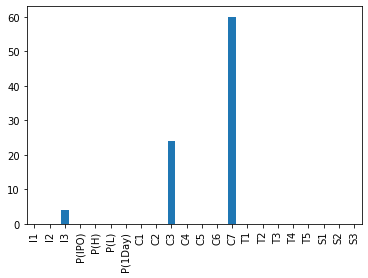

In [20]:
# Checking ratio of null values in the columns 
reset_df.isna().sum().plot(kind='bar')

# Imputation

Before we begin the imputation process, we will create a list of continuous columns that we will `fillna()` with the `fillna_median` function that we have created below

In [21]:
cont_cols = ['S1','S2','S3','T1','T2','T3','T4','T5','P(IPO)','P(H)','P(L)',\
       'P(1Day)','C1','C3','C4','C5','C6','C7']

In [22]:
## Creating a function to fill null values in the continuous column with the MEDIAN
def fillna_median(df, columns):
    for col in columns:
        median = df[col].median()
        df[col].fillna(median, inplace=True)
    return df

In [23]:
## Filling the null values
df = fillna_median(reset_df, cont_cols)

Since `I3` is a text column, we will `fillna()` the column with the `mode` 

In [24]:
## Filling the I3 Null Values with the MODE
df['I3'] = df['I3'].fillna(df['I3'].mode()[0])

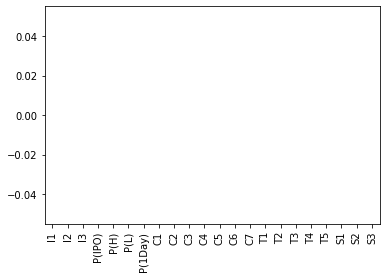

In [25]:
df.isna().sum().plot(kind='bar')

The imputation process is successful as there is no more null values in the `df`. Now we will continue on the feature engineering section for both control and target variables.

# Feature Engineering

In [26]:
# Avg stock price between the higher and lower bounds
df['P(mid)'] = (df['P(H)']+df['P(L)'])/2
df.dtypes

I1          object
I2          object
I3         float64
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
P(mid)     float64
dtype: object

In [27]:
# T4^ is the ratio of total sentences which are long
df['T4^'] = df['T4']/df['T1']
df['T4^'] = df['T4^'].replace(np.inf, df['T4^'].median())
df['T4^']

0      0.640426
1      0.644753
2      0.636816
3      0.539634
4      0.587413
         ...   
655    0.612663
656    0.647177
657    0.647761
658    0.710938
659    0.670702
Name: T4^, Length: 660, dtype: float64

In [28]:
#Ratio number of real words (T3) against all words (T1)
df['T3^'] = df['T3']/df['T2']
df['T3^'] = df['T3^'].replace(np.inf, df['T3^'].median())
df['T3^']

0      0.908876
1      0.898724
2      0.909350
3      0.917060
4      0.888469
         ...   
655    0.920952
656    0.906227
657    0.889600
658    0.909412
659    0.904288
Name: T3^, Length: 660, dtype: float64

In [29]:
#Ratio of long words against all words
df['T5^'] = df['T5']/df['T2']
df['T5^'] = df['T5^'].replace(np.inf, df['T5^'].median())
df['T5^']

0      0.054250
1      0.051395
2      0.061764
3      0.061630
4      0.048550
         ...   
655    0.050603
656    0.056770
657    0.047976
658    0.043178
659    0.054545
Name: T5^, Length: 660, dtype: float64

In [30]:
#Percentage of positive words
df['S1^'] = df['S1']/df['T2']
df['S1^'] = np.where(df['S1^'] == np.inf, df['S1^'].median(), df['S1^'])
df['S1^']

0      0.004875
1      0.003258
2      0.011593
3      0.009686
4      0.004518
         ...   
655    0.006512
656    0.005069
657    0.004191
658    0.006773
659    0.008062
Name: S1^, Length: 660, dtype: float64

In [31]:
#Percentage of negative words
df['S2^'] = df['S2']/df['T2']
df['S2^'] = df['S2^'].replace(np.inf, df['S2^'].median())
df['S2^']

0      0.009199
1      0.011105
2      0.006271
3      0.007144
4      0.010047
         ...   
655    0.007935
656    0.009124
657    0.009044
658    0.005362
659    0.008834
Name: S2^, Length: 660, dtype: float64

In [32]:
#Percentage of uncertain words
df['S3^'] = df['S3']/df['T2']
df['S3^'] = df['S3^'].replace(np.inf, df['S3^'].median())
df['S3^']

0      0.010929
1      0.010876
2      0.011403
3      0.013319
4      0.011261
         ...   
655    0.012950
656    0.012527
657    0.009926
658    0.014110
659    0.013551
Name: S3^, Length: 660, dtype: float64

In [33]:
df.iloc[:, -10:].head()

,S1,S2,S3,P(mid),T4^,T3^,T5^,S1^,S2^,S3^
0,62.0,117.0,139.0,9.0,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929
1,71.0,242.0,237.0,9.0,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876
2,61.0,33.0,60.0,13.0,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403
3,80.0,59.0,110.0,15.0,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319
4,67.0,149.0,167.0,20.0,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261


## Target Variables: Y1 & Y2

In [34]:
## Creating the Y1 target columns

#Y1 is the Pre-IPO Price Revision
df['Y1'] = np.where(df['P(IPO)']<df['P(mid)'], 1,0)
df['Y1'] = df['Y1'].astype('category')
df['Y1'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [35]:
## Creating the Y2 target columns

#Y2 is the Post-IPO Initial Return
df['Y2'] = np.where(df['P(IPO)']<df['P(1Day)'], 1,0)
df['Y2'] = df['Y2'].astype('category')
df['Y2'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

## Control Variables: C3^, C5^, C6^

In [36]:
#Positive EPS Dummy
#Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0
df['C3^'] = np.where(df['C3'] > 0, 1, 0)
df['C3^'] = df['C3^'].astype('category')
df['C3^'].head() 

0    1
1    0
2    0
3    0
4    1
Name: C3^, dtype: category
Categories (2, int64): [0, 1]

In [37]:
#Share Overhang
df['C5^'] =  df['C5']/df['C6']
df['C5^'].dtypes

dtype('float64')

In [38]:
#Up Revision
#Set to (P(IPO) – P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0
df['C6^'] = np.where(df['P(IPO)'] > df['P(mid)'], (df['P(IPO)'] - df['P(mid)'])/df['P(mid)'] * 100, 0)

df['C6^'] 

0      11.111111
1       0.000000
2       0.000000
3       0.000000
4       5.000000
         ...    
655    20.000000
656     0.000000
657     0.000000
658    18.750000
659     6.666667
Name: C6^, Length: 660, dtype: float64

In [39]:
df['C2'] = df['C2'].astype('category')

In [40]:
df.dtypes

I1           object
I2           object
I3          float64
P(IPO)      float64
P(H)        float64
P(L)        float64
P(1Day)     float64
C1          float64
C2         category
C3          float64
C4          float64
C5          float64
C6          float64
C7          float64
T1          float64
T2          float64
T3          float64
T4          float64
T5          float64
S1          float64
S2          float64
S3          float64
P(mid)      float64
T4^         float64
T3^         float64
T5^         float64
S1^         float64
S2^         float64
S3^         float64
Y1         category
Y2         category
C3^        category
C5^         float64
C6^         float64
dtype: object

## Extra Features

In [41]:
# Splitting companies to Tech vs. Non-Tech
def categorize_sic_code(sic_code):
    if str(sic_code).startswith("37") or str(sic_code).startswith("73"):
        return "Tech"
    else:
        return "Non-Tech"

In [42]:
# Categorize Companies if Tech or Non-Tech
df['I3_type'] = df['I3'].apply(categorize_sic_code)
df[['I3','I3_type']].sample(10)

,I3,I3_type
352,3845.0,Non-Tech
437,3577.0,Non-Tech
619,8090.0,Non-Tech
572,3714.0,Tech
580,3714.0,Tech
334,8200.0,Non-Tech
428,3674.0,Non-Tech
207,7371.0,Tech
293,3674.0,Non-Tech
156,2834.0,Non-Tech


In [43]:
## Replacements for Tech OHE
df['I3^'] = np.where(df['I3_type']=='Tech', 1, 0)
df['I3^'] = df['I3^'].astype('category')

We assume that `P(H)` should be higher than `P(L)` so we decided to go through each observation and whenever the `P(L)` is higher than `P(H)`, we will switch the price in the below function. 

In [44]:
# To check if P(H) > P(L), if not then switch the price
def switch_prices(high_price, low_price):
    if high_price < low_price:
        temp = high_price
        high_price = low_price
        low_price = temp
    return (high_price, low_price)

In [45]:
df[['P(H)', 'P(L)']] = df.apply(lambda x: switch_prices(x['P(H)'], x['P(L)']), axis=1, result_type="expand")


In [46]:
def categorize_industry(sic_code):
  if sic_code in manuf_codes:
    return "Manufacturing"
  elif sic_code in serv_codes:
    return "Service"
  elif sic_code in other_codes:
    return "Other"
  else:
    return "Other"

df['Industry'] = df['I3'].apply(categorize_industry)

In [47]:
industry_dummy = pd.get_dummies(df['Industry'])
industry_dummy

,Manufacturing,Other,Service
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
655,0,0,1
656,0,0,1
657,1,0,0
658,0,0,1


## Isolating Categorical and Continuous Features (End of Feature Engineering)

In [48]:
## Isolating Categorical columns into `cat_df`
cat_cols = ['I1','I2','I3','C2','Y1','Y2','C3^','I3^']
cat_df = df[cat_cols]
cat_df.dtypes

I1       object
I2       object
I3      float64
C2     category
Y1     category
Y2     category
C3^    category
I3^    category
dtype: object

In [49]:
## Isolating Continuous columns into `cont_df`
cont_cols = ['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T3^','T4^','T5^','S1^','S2^','S3^','C5^','C6^']

cont_df = df[cont_cols]
cont_df.dtypes

P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
P(mid)     float64
C1         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T3^        float64
T4^        float64
T5^        float64
S1^        float64
S2^        float64
S3^        float64
C5^        float64
C6^        float64
dtype: object

In [50]:
cont_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,14.034621,15.634636,13.611152,25.934766,14.622894,149.728788,0.066724,0.007282,4.996285e+07,1.258248e+07,470.631368,0.889822,0.626720,0.052064,0.005302,0.009028,0.011494,4.417255,5.404645
std,5.954214,6.576552,5.824075,73.234948,6.187137,152.817467,158.390378,0.033318,1.055377e+08,2.539940e+07,1587.801852,0.064613,0.077686,0.007087,0.001752,0.002953,0.002816,5.133537,10.877569
min,5.000000,6.000000,0.000000,0.000000,4.000000,10.000000,-786.239000,-0.162352,3.693227e+06,8.000000e+05,0.074000,0.000000,0.000000,-0.000089,-0.000093,0.002152,0.005326,0.283223,0.000000
25%,10.000000,13.000000,11.000000,11.000000,12.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,0.883417,0.580329,0.047544,0.004131,0.006966,0.009579,2.850622,0.000000
50%,13.750000,15.500000,13.000000,14.845000,14.250000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,0.897260,0.628861,0.051926,0.005024,0.008573,0.011300,3.731035,0.000000
75%,17.000000,17.000000,15.000000,20.485000,16.000000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,0.909651,0.674461,0.056401,0.006240,0.010503,0.012841,4.857904,7.692308
max,85.000000,135.000000,108.000000,1159.200562,121.500000,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,0.962052,0.826347,0.073417,0.012839,0.024605,0.029397,99.787255,100.000000


# IQR + MinMaxScale

## Outlier Handling with IQR

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Text(0.5, 1.0, 'Visualization of Outliers')

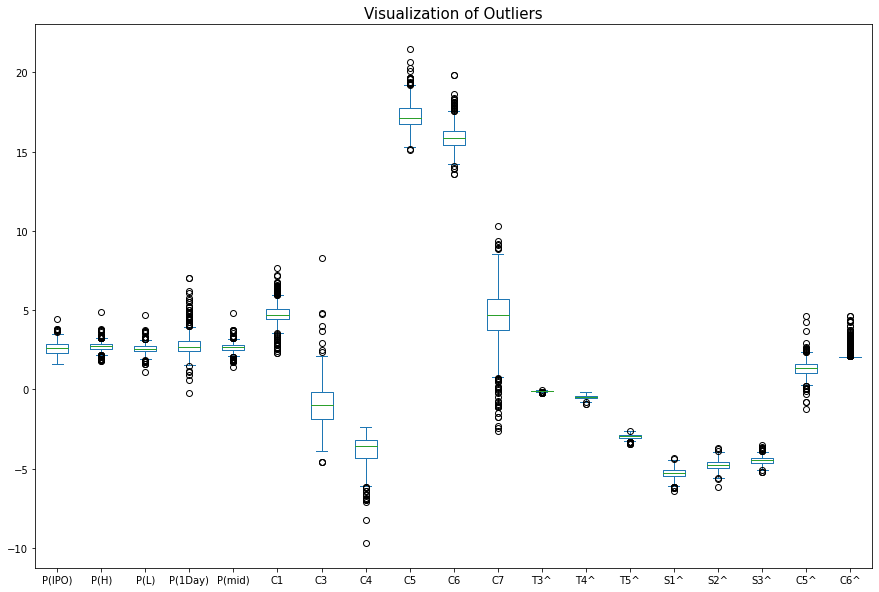

In [91]:
np.log(cont_df).plot(kind='box', figsize=(15,10))
plt.title('Visualization of Outliers', fontsize=15)

In [52]:
def outlier_replace(col):
  '''
  # This function takes a series (column)
  and replaces detected outliers with the 
  lower and uper bounds of the data.
  ---
  Input:
  col(float or int): A column of choice either 
  int or float.
  ---
  Output:
  The column with the outlier values replaced
  with lower and upper bound values of the date
  '''
  q1 = np.quantile(col, .25) #1st quantile
  q3 = np.quantile(col, .75) #3rd quantile

  iqr = q3 - q1 #The interquartile range. The middle 50% of the observations

  bound_lower = q1 - 1.5 * iqr #lower bounds
  bound_upper = q3 + 1.5 * iqr #upper bounds

  #replace values below the lower bounds with the lower bound value
  col = np.where(col < bound_lower, bound_lower, col) 

  #replace values above the upper bounds with the upper bound value
  col = np.where(col > bound_upper, bound_upper, col)



  return  col

Text(0.5, 1.0, 'Outliers Handled')

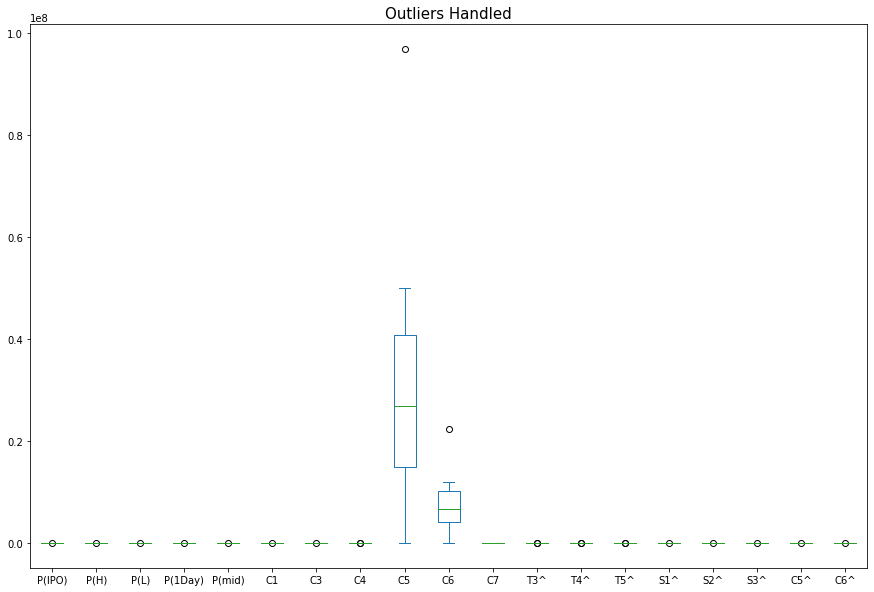

In [90]:
handled_df = pd.DataFrame()

for c in list(cont_df.columns):
  handled_df[c] = outlier_replace(cont_df[c])



handled_df.describe().plot(kind='box',figsize=(15,10))
plt.title('Outliers Handled', fontsize=15)

In [54]:
handled_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,13.798258,15.202061,13.244485,16.562874,14.219864,126.911932,-0.258577,0.007433,3.776132e+07,9.562688e+06,210.797297,0.894327,0.628160,0.052107,0.005273,0.008954,0.011405,4.009806,4.363858
std,4.692637,3.713070,3.645573,8.078217,3.681482,64.094744,1.239799,0.032757,2.642445e+07,5.990139e+06,232.171513,0.021742,0.069922,0.006745,0.001653,0.002719,0.002499,1.647987,6.431440
min,5.000000,7.000000,5.000000,0.000000,6.000000,10.000000,-2.591250,-0.082174,3.693227e+06,8.000000e+05,0.074000,0.844065,0.439132,0.034258,0.000967,0.002152,0.005326,0.283223,0.000000
25%,10.000000,13.000000,11.000000,11.000000,12.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,0.883417,0.580329,0.047544,0.004131,0.006966,0.009579,2.850622,0.000000
50%,13.750000,15.500000,13.000000,14.845000,14.250000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,0.897260,0.628861,0.051926,0.005024,0.008573,0.011300,3.731035,0.000000
75%,17.000000,17.000000,15.000000,20.485000,16.000000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,0.909651,0.674461,0.056401,0.006240,0.010503,0.012841,4.857904,7.692308
max,27.500000,23.000000,21.000000,34.712499,22.000000,260.625000,2.198750,0.092896,9.693614e+07,2.231318e+07,689.723000,0.949003,0.815658,0.069687,0.009405,0.015809,0.017734,7.868826,19.230769


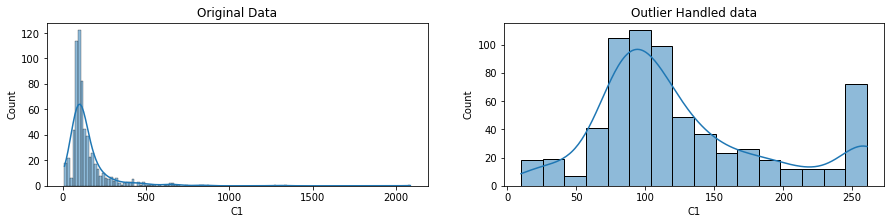

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(cont_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(handled_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Outlier Handled data")
plt.show()

Removing utlierssignificantly imporved Distribution shape.

## MinMax Scaling

In [56]:
minmaxscaler = preprocessing.MinMaxScaler()

#The code below chnages the Saclaed data into numpy arrays
scaled_data = minmaxscaler.fit_transform(handled_df)

# Scaled data into data frame and reassigning columns
scaled_df = pd.DataFrame(scaled_data, columns=cont_cols)

scaled_df.head()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
0,0.222222,0.15625,0.21875,0.341952,0.1875,0.446883,1.000000,0.635450,0.399696,0.455535,0.074344,0.617616,0.534607,0.564274,0.463135,0.515974,0.451537,0.472094,0.577778
1,0.133333,0.18750,0.18750,0.208858,0.1875,0.993516,0.202766,0.393113,0.270004,0.074373,0.037500,0.520871,0.546102,0.483701,0.271554,0.655553,0.447267,1.000000,0.000000
2,0.088889,0.43750,0.43750,0.193014,0.4375,0.319202,0.282098,0.587702,0.141056,0.195229,0.010591,0.622129,0.525021,0.776365,1.000000,0.301611,0.489737,0.406811,0.000000
3,0.288889,0.56250,0.56250,0.356932,0.5625,0.794015,0.350992,0.583750,0.119638,0.171988,0.012256,0.695602,0.266919,0.772587,1.000000,0.365488,0.644181,0.397658,0.000000
4,0.711111,0.87500,0.87500,1.000000,0.8750,0.279302,0.555585,0.270058,0.290086,0.346299,0.916733,0.423147,0.393812,0.403405,0.420858,0.578096,0.478329,0.453892,0.260000


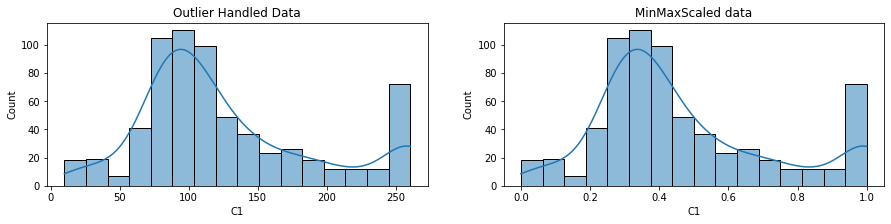

In [87]:
# plot both together to compare
# Using 'C1' as example
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(handled_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Outlier Handled Data")
sns.histplot(scaled_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("MinMaxScaled data")
plt.show()

# Normalization

## Power Transformer

In [58]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

print(pt.fit(scaled_df))

print(pt.lambdas_)

normal_df = pt.transform(scaled_df)

PowerTransformer()
[-0.2966598   0.73465707  0.58850298 -1.19460391  0.67173932 -1.19085039
  1.75411079  1.89491613 -2.49595377 -2.27090575 -3.02914787  2.45062843
  1.1866334   0.8481757  -0.69739521 -1.07626711 -0.249978   -0.93727306
 -3.86605347]


In [59]:
normal_df = pd.DataFrame(normal_df, columns=cont_cols)
normal_df

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
0,-0.793852,-1.566649,-1.326395,-0.507226,-1.446354,0.104438,2.223427,0.639711,0.481063,0.495955,-0.744522,0.644111,0.164585,0.326333,-0.143453,0.227578,-0.111984,0.046343,1.353772
1,-1.329353,-1.422739,-1.477000,-1.336932,-1.446354,1.741249,-1.111800,-0.678523,-0.085902,-1.798602,-1.054544,0.111360,0.226936,-0.095960,-1.328533,0.871078,-0.134134,1.958621,-0.769652
2,-1.617970,-0.305006,-0.313530,-1.449296,-0.308600,-0.495540,-0.837205,0.365064,-0.891914,-0.808322,-1.310627,0.670132,0.112649,1.422678,2.113915,-1.041157,0.082621,-0.286315,-0.769652
3,-0.424318,0.234183,0.236710,-0.424976,0.235590,1.269998,-0.588087,0.342659,-1.058373,-0.973199,-1.293984,1.108657,-1.261629,1.403329,2.113915,-0.619807,0.810202,-0.335364,-0.769652
4,1.451842,1.534811,1.538195,1.859991,1.537225,-0.710071,0.208848,-1.275185,0.015137,0.047979,1.554660,-0.379105,-0.591915,-0.520286,-0.381552,0.528572,0.025162,-0.043500,0.744547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.930719,0.234183,0.236710,1.359339,0.235590,1.754843,-0.159422,-0.141655,0.375783,0.334774,0.359969,1.340792,-0.233285,-0.213798,0.815593,-0.271629,0.677013,0.109780,1.617642
656,-0.078773,0.234183,0.236710,0.028093,0.235590,-0.333884,-0.192061,1.671070,0.117963,-0.242780,-1.060767,0.500491,0.261895,0.696525,-0.018685,0.199726,0.520428,0.535934,-0.769652
657,-1.329353,-1.857613,-1.629245,-1.282946,-1.742697,-0.070256,0.674698,0.684783,-1.365806,-1.486628,-0.698582,-0.327352,0.270318,-0.606354,-0.610513,0.169776,-0.545495,-0.078383,-0.769652
658,1.110579,0.499456,0.505016,-0.417952,0.502297,-0.754750,0.320876,0.747111,-1.206222,-1.486628,-0.107031,0.673521,1.190912,-1.331976,0.950735,-1.528701,1.086212,0.266745,1.608883


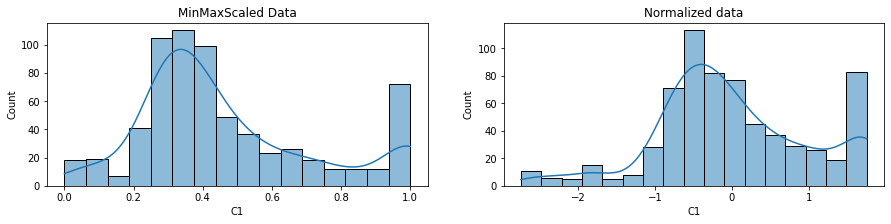

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(scaled_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("MinMaxScaled Data")
sns.histplot(normal_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# StandardScaler + 3*std

## StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler
def scale_dataframe(df):
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_df

In [62]:
standard_df = scale_dataframe(normal_df)
standard_df

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
0,-0.793852,-1.566649,-1.326395,-0.507226,-1.446354,0.104438,2.223427,0.639711,0.481063,0.495955,-0.744522,0.644111,0.164585,0.326333,-0.143453,0.227578,-0.111984,0.046343,1.353772
1,-1.329353,-1.422739,-1.477000,-1.336932,-1.446354,1.741249,-1.111800,-0.678523,-0.085902,-1.798602,-1.054544,0.111360,0.226936,-0.095960,-1.328533,0.871078,-0.134134,1.958621,-0.769652
2,-1.617970,-0.305006,-0.313530,-1.449296,-0.308600,-0.495540,-0.837205,0.365064,-0.891914,-0.808322,-1.310627,0.670132,0.112649,1.422678,2.113915,-1.041157,0.082621,-0.286315,-0.769652
3,-0.424318,0.234183,0.236710,-0.424976,0.235590,1.269998,-0.588087,0.342659,-1.058373,-0.973199,-1.293984,1.108657,-1.261629,1.403329,2.113915,-0.619807,0.810202,-0.335364,-0.769652
4,1.451842,1.534811,1.538195,1.859991,1.537225,-0.710071,0.208848,-1.275185,0.015137,0.047979,1.554660,-0.379105,-0.591915,-0.520286,-0.381552,0.528572,0.025162,-0.043500,0.744547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.930719,0.234183,0.236710,1.359339,0.235590,1.754843,-0.159422,-0.141655,0.375783,0.334774,0.359969,1.340792,-0.233285,-0.213798,0.815593,-0.271629,0.677013,0.109780,1.617642
656,-0.078773,0.234183,0.236710,0.028093,0.235590,-0.333884,-0.192061,1.671070,0.117963,-0.242780,-1.060767,0.500491,0.261895,0.696525,-0.018685,0.199726,0.520428,0.535934,-0.769652
657,-1.329353,-1.857613,-1.629245,-1.282946,-1.742697,-0.070256,0.674698,0.684783,-1.365806,-1.486628,-0.698582,-0.327352,0.270318,-0.606354,-0.610513,0.169776,-0.545495,-0.078383,-0.769652
658,1.110579,0.499456,0.505016,-0.417952,0.502297,-0.754750,0.320876,0.747111,-1.206222,-1.486628,-0.107031,0.673521,1.190912,-1.331976,0.950735,-1.528701,1.086212,0.266745,1.608883


In [63]:
standard_df.skew()

P(IPO)     0.004030
P(H)      -0.011350
P(L)      -0.008942
P(1Day)    0.014499
P(mid)    -0.010302
C1         0.015976
C3        -0.032990
C4        -0.035032
C5         0.174945
C6         0.127117
C7         0.345711
T3^       -0.045162
T4^       -0.009701
T5^        0.002289
S1^        0.003393
S2^        0.013674
S3^        0.001345
C5^        0.005550
C6^        0.609398
dtype: float64

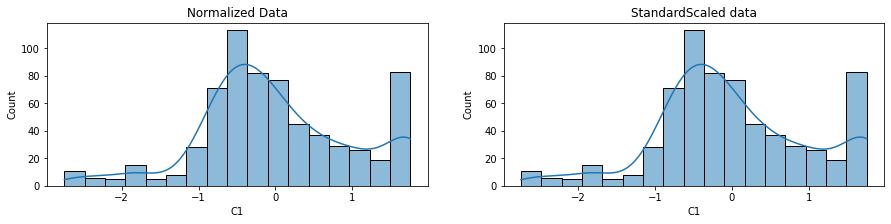

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(normal_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Normalized Data")
sns.histplot(standard_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("StandardScaled data")
plt.show()

## Handle Outliers with 3*StD

In [65]:
## Handling outliers with x_bar +/- 3*StD
def handle_outliers(df):
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    return df

In [66]:
handling_df = handle_outliers(standard_df)
handling_df

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
0,-0.793852,-1.566649,-1.326395,-0.507226,-1.446354,0.104438,2.223427,0.639711,0.481063,0.495955,-0.744522,0.644111,0.164585,0.326333,-0.143453,0.227578,-0.111984,0.046343,1.353772
1,-1.329353,-1.422739,-1.477000,-1.336932,-1.446354,1.741249,-1.111800,-0.678523,-0.085902,-1.798602,-1.054544,0.111360,0.226936,-0.095960,-1.328533,0.871078,-0.134134,1.958621,-0.769652
2,-1.617970,-0.305006,-0.313530,-1.449296,-0.308600,-0.495540,-0.837205,0.365064,-0.891914,-0.808322,-1.310627,0.670132,0.112649,1.422678,2.113915,-1.041157,0.082621,-0.286315,-0.769652
3,-0.424318,0.234183,0.236710,-0.424976,0.235590,1.269998,-0.588087,0.342659,-1.058373,-0.973199,-1.293984,1.108657,-1.261629,1.403329,2.113915,-0.619807,0.810202,-0.335364,-0.769652
4,1.451842,1.534811,1.538195,1.859991,1.537225,-0.710071,0.208848,-1.275185,0.015137,0.047979,1.554660,-0.379105,-0.591915,-0.520286,-0.381552,0.528572,0.025162,-0.043500,0.744547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.930719,0.234183,0.236710,1.359339,0.235590,1.754843,-0.159422,-0.141655,0.375783,0.334774,0.359969,1.340792,-0.233285,-0.213798,0.815593,-0.271629,0.677013,0.109780,1.617642
656,-0.078773,0.234183,0.236710,0.028093,0.235590,-0.333884,-0.192061,1.671070,0.117963,-0.242780,-1.060767,0.500491,0.261895,0.696525,-0.018685,0.199726,0.520428,0.535934,-0.769652
657,-1.329353,-1.857613,-1.629245,-1.282946,-1.742697,-0.070256,0.674698,0.684783,-1.365806,-1.486628,-0.698582,-0.327352,0.270318,-0.606354,-0.610513,0.169776,-0.545495,-0.078383,-0.769652
658,1.110579,0.499456,0.505016,-0.417952,0.502297,-0.754750,0.320876,0.747111,-1.206222,-1.486628,-0.107031,0.673521,1.190912,-1.331976,0.950735,-1.528701,1.086212,0.266745,1.608883


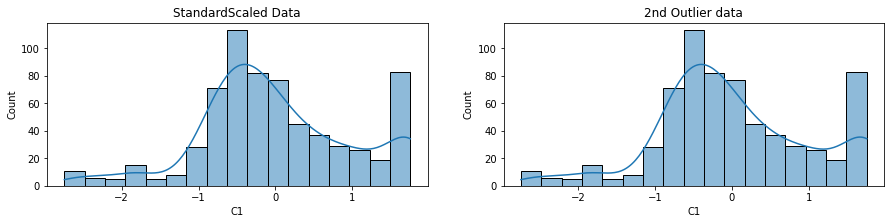

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(standard_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("StandardScaled Data")
sns.histplot(handling_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("2nd Outlier data")
plt.show()

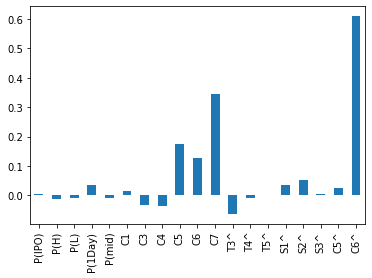

In [68]:
handling_df.skew().plot(kind='bar')

Skewness was significantly reduced and data distribution is more Gaussian.

In [69]:
handling_df.skew().abs().sum()

1.6001711285894453

In [70]:
p3_df = pd.concat([handling_df, cat_df, industry_dummy], axis = 1)
p3_df

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,...,I2,I3,C2,Y1,Y2,C3^,I3^,Manufacturing,Other,Service
0,-0.793852,-1.566649,-1.326395,-0.507226,-1.446354,0.104438,2.223427,0.639711,0.481063,0.495955,...,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,1.0,0,1,1,0,1,0,0
1,-1.329353,-1.422739,-1.477000,-1.336932,-1.446354,1.741249,-1.111800,-0.678523,-0.085902,-1.798602,...,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,0.0,1,0,0,0,0,1,0
2,-1.617970,-0.305006,-0.313530,-1.449296,-0.308600,-0.495540,-0.837205,0.365064,-0.891914,-0.808322,...,ACADIA PHARMACEUTICALS INC,2834.0,1.0,1,0,0,0,0,1,0
3,-0.424318,0.234183,0.236710,-0.424976,0.235590,1.269998,-0.588087,0.342659,-1.058373,-0.973199,...,ACHILLION PHARMACEUTICALS INC,2834.0,1.0,1,1,0,0,0,1,0
4,1.451842,1.534811,1.538195,1.859991,1.537225,-0.710071,0.208848,-1.275185,0.015137,0.047979,...,AMERICAN COMMERCIAL LINES INC.,4492.0,1.0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.930719,0.234183,0.236710,1.359339,0.235590,1.754843,-0.159422,-0.141655,0.375783,0.334774,...,ZIPCAR INC,7514.0,1.0,0,1,0,0,0,0,1
656,-0.078773,0.234183,0.236710,0.028093,0.235590,-0.333884,-0.192061,1.671070,0.117963,-0.242780,...,Zeltiq Aesthetics Inc,3845.0,1.0,1,1,0,0,0,0,1
657,-1.329353,-1.857613,-1.629245,-1.282946,-1.742697,-0.070256,0.674698,0.684783,-1.365806,-1.486628,...,"ZST Digital Networks, Inc.",3663.0,0.0,0,0,1,0,1,0,0
658,1.110579,0.499456,0.505016,-0.417952,0.502297,-0.754750,0.320876,0.747111,-1.206222,-1.486628,...,Zumiez Inc,5600.0,1.0,0,0,1,0,0,0,1


In [71]:
p3_df.isna().sum()

P(IPO)           0
P(H)             0
P(L)             0
P(1Day)          0
P(mid)           0
C1               0
C3               0
C4               0
C5               0
C6               0
C7               0
T3^              0
T4^              0
T5^              0
S1^              0
S2^              0
S3^              0
C5^              0
C6^              0
I1               0
I2               0
I3               0
C2               0
Y1               0
Y2               0
C3^              0
I3^              0
Manufacturing    0
Other            0
Service          0
dtype: int64

# Feature Selection

In [72]:
# Import the necessary libraries first
#### Correlation method - for classification chi2 only
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
#### RFE method - replace the model with the model you plan to use
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
#### feature importance method
#### this method can be used for both topK and cut-off
from sklearn.linear_model import Ridge
#### specifically tree-based feature importance method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#### for voting
from collections import Counter
#### for ANOVA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [73]:
usable_cols = ['T3^','T4^','T5^','S1^','S2^','S3^','C1','C2','C3^','C5^','C6^','C7','I3^','Manufacturing','Service','Other','Y1','Y2']

In [74]:
features_df = p3_df[usable_cols]
features_df

,T3^,T4^,T5^,S1^,S2^,S3^,C1,C2,C3^,C5^,C6^,C7,I3^,Manufacturing,Service,Other,Y1,Y2
0,0.644111,0.164585,0.326333,-0.143453,0.227578,-0.111984,0.104438,1.0,1,0.046343,1.353772,-0.744522,0,1,0,0,0,1
1,0.111360,0.226936,-0.095960,-1.328533,0.871078,-0.134134,1.741249,0.0,0,1.958621,-0.769652,-1.054544,0,0,0,1,1,0
2,0.670132,0.112649,1.422678,2.113915,-1.041157,0.082621,-0.495540,1.0,0,-0.286315,-0.769652,-1.310627,0,0,0,1,1,0
3,1.108657,-1.261629,1.403329,2.113915,-0.619807,0.810202,1.269998,1.0,0,-0.335364,-0.769652,-1.293984,0,0,0,1,1,1
4,-0.379105,-0.591915,-0.520286,-0.381552,0.528572,0.025162,-0.710071,1.0,1,-0.043500,0.744547,1.554660,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1.340792,-0.233285,-0.213798,0.815593,-0.271629,0.677013,1.754843,1.0,0,0.109780,1.617642,0.359969,0,0,1,0,0,1
656,0.500491,0.261895,0.696525,-0.018685,0.199726,0.520428,-0.333884,1.0,0,0.535934,-0.769652,-1.060767,0,0,1,0,1,1
657,-0.327352,0.270318,-0.606354,-0.610513,0.169776,-0.545495,-0.070256,0.0,1,-0.078383,-0.769652,-0.698582,0,1,0,0,0,0
658,0.673521,1.190912,-1.331976,0.950735,-1.528701,1.086212,-0.754750,1.0,1,0.266745,1.608883,-0.107031,0,0,1,0,0,0


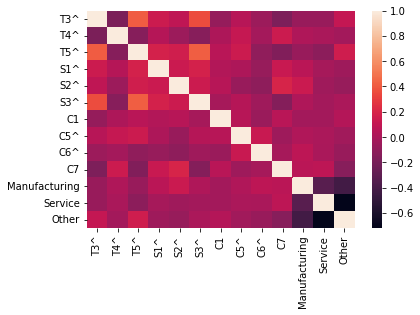

In [75]:
sns.heatmap(features_df.corr())

In [76]:
X = features_df.drop(columns=['Y1','Y2'])
y1 = features_df['Y1']
y2 = features_df['Y2']

In [77]:
X.shape

(660, 16)

In [78]:
y1.shape

(660,)

In [79]:
y2.shape

(660,)

In [80]:
def feature_selector(X, y, model, names, _method="topk", n=int(X.shape[1]/2), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    ############################################################################
    #### IMPORTANT: 
    #### use `chi2` as the `score_func` when doing categorical features - values has to be non-negative
    #### use `f_classif` as the `score_func` when doing categorical and continuous feautures
    #### use `f_regression` as the `score_func` when doing continuous feautures
    ############################################################################
    corr_features = list(np.argpartition(SelectKBest(score_func=f_classif, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])

  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")

  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)

  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[f]:c for f,c in counted}).sort_values(ascending=False)
  selected_idx = sorted([f for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])





In [81]:
feature_selector(X, y1, model=RandomForestClassifier(), names = usable_cols, n=6)

Using the Top-K method: 
Selected features by correlation:  ['C3^' 'T5^' 'S2^' 'C6^' 'T3^' 'S1^']
Selected features by RFE:  ['T3^' 'T5^' 'S2^' 'C5^' 'C6^' 'C7']
Selected features by Ridge coefficients:  ['S2^' 'T4^' 'T3^' 'C2' 'S1^' 'Other']
Selected features by Extra Tree feature importance:  ['C6^' 'S2^' 'C7' 'S1^' 'T5^' 'T3^']
Selected features by Random Forest feature importance:  ['C6^' 'S2^' 'C7' 'C5^' 'S1^' 'T5^']
S2^    5
T5^    4
C6^    4
T3^    4
S1^    4
C7     3
dtype: int64


array(['T3^', 'T5^', 'S1^', 'S2^', 'C6^', 'C7'], dtype='<U13')

In [82]:
out_path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/P3A_data.xlsx'
features_df.to_excel(out_path)